In [1]:
%load_ext autoreload
%autoreload 2

## Unsupervised Learning and Extraction of Blinking Patterns

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import espbm

### Data Loading

In [126]:
ear_data = pd.read_csv("data/sample_ear_full.csv")
display(ear_data.head())

ear_l = ear_data["EAR2D6_l"].to_numpy()
ear_r = ear_data["EAR2D6_r"].to_numpy()

,frame,EAR2D6_l,EAR2D6_r,EAR2D6_valid,EAR3D6_l,EAR3D6_r,EAR3D6_valid,BS_EyeBlinkLeft_value,BS_EyeBlinkRight_value,BS_Valid
0,0,0.321287,0.314708,True,0.315574,0.310234,True,0.090246,0.068722,True
1,1,0.315050,0.315010,True,0.308516,0.309432,True,0.096699,0.093424,True
2,2,0.330932,0.306904,True,0.324748,0.301791,True,0.091741,0.101937,True
3,3,0.332514,0.305294,True,0.327643,0.299898,True,0.082394,0.098083,True
4,4,0.328775,0.305294,True,0.322929,0.300215,True,0.093634,0.097883,True


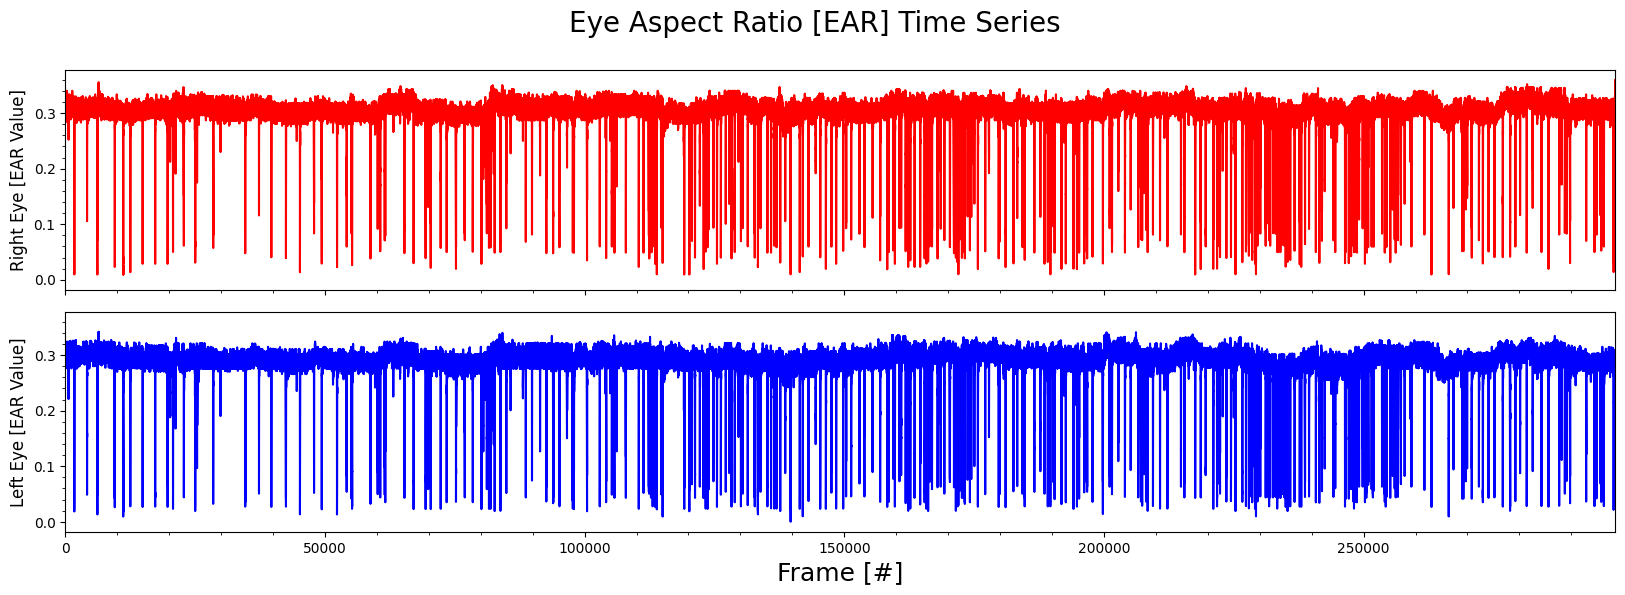

In [127]:
espbm.plot.ear_time_series(ear_l, ear_r)
plt.show()

----

(6.0, 12.0, 0.3, 0.25, 0.3333333333333333)


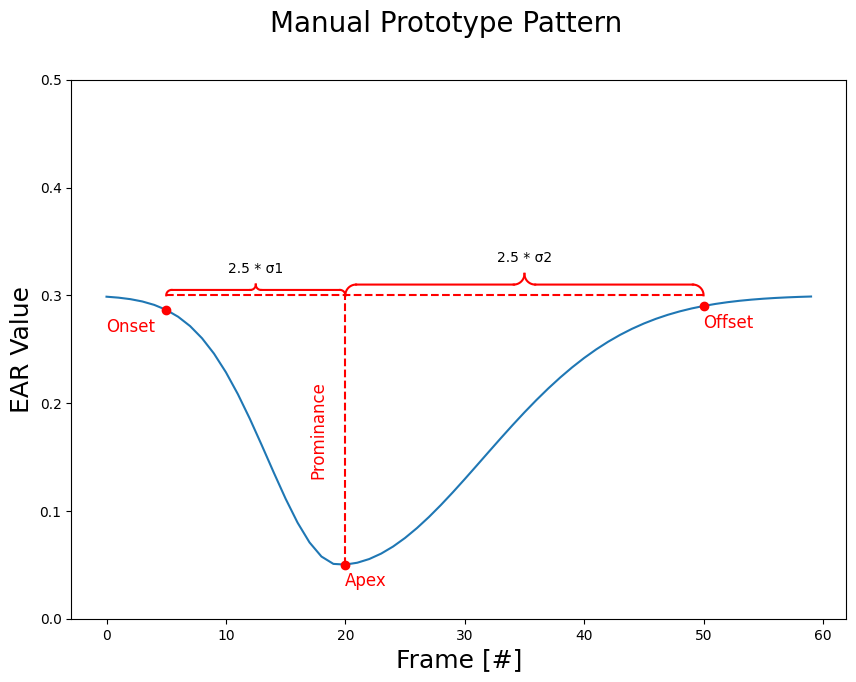

In [128]:
prototype, params = espbm.manual.define_prototype(
    sig1=6.0,
    sig2=12.0,
    window_size=60,
    return_params=True,
)
print(params)
espbm.plot.manual_prototype(prototype=prototype, params=params, window_size=60)
plt.show()

In [ ]:
matches_l = espbm.match.find_prototype(ear_l, prototype, max_prototype_distance=3.0)
matches_r = espbm.match.find_prototype(ear_r, prototype, max_prototype_distance=3.0)

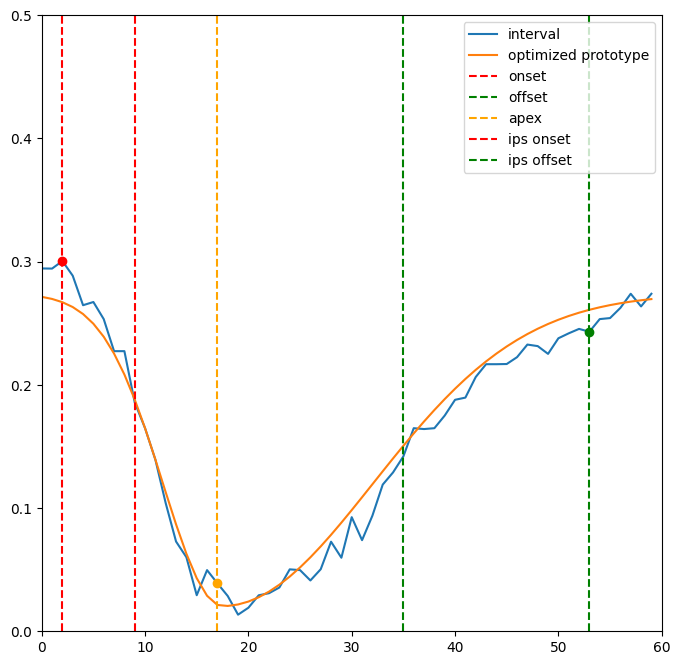

In [143]:
idx = 6
interval = ear_l[matches_l[idx][0] : matches_l[idx][1]]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim(0, len(interval))
ax.set_ylim(0, 0.5)
ax.plot(interval, label="interval")


o_proto, o_params = espbm.match.optim(interval, params, window_size=60)
if o_params is None:
    print("No match found")
else:
    ax.plot(o_proto, label="optimized prototype")

    # plot the onset, offset and apex
    sig1, sig2, baseline, prominance, apex_location = o_params
    stats = espbm.match.interval_stats(interval, o_params)

    ax.axvline(stats["onset_x"], color="red", linestyle="--", label="onset")
    ax.axvline(stats["offset_x"], color="green", linestyle="--", label="offset")
    ax.axvline(stats["apex_location"], color="orange", linestyle="--", label="apex")

    # plot the onset, offset and apex
    ax.plot(stats["onset_x"], stats["onset_y"], "ro")
    ax.plot(stats["offset_x"], stats["offset_y"], "go")
    ax.plot(stats["apex_location"], stats["apex_score"], "o", color="orange")

    # ips
    ax.axvline(stats["ips_left"], color="red", linestyle="--", label="ips onset")
    ax.axvline(stats["ips_right"], color="green", linestyle="--", label="ips offset")

    ax.legend()
plt.show()

In [124]:
import time

In [125]:
# time it
s = time.time()
for m in matches_l:
    _from, _to, _ = m
    interval = ear_l[_from:_to]
    o_proto, o_params = espbm.match.optim(interval, params)
print(time.time() - s)

11.400874376296997
